In [5]:
# Active, Reactive and Apparent Power

In [81]:
import numpy as np
from numpy import sqrt, exp, cos, sin, abs, pi, real, imag, conj
import matplotlib.pyplot as plt

## Current, Resistance, Reactance, Impedance, Voltage

$$
I(t)=I_0e^{i\omega t}
$$

$$
I_0 = I_\mathrm{rms} \sqrt 2
$$

Ohmic resistance:

$$
R = 10 \Omega 
$$

Inductive reactance:

$$
X_L = i\omega L = i R_L
$$

with 

$$
\omega L = R_L = 10\Omega
$$


In [145]:
Irms = 1
I0 = sqrt(2)*Irms
T = 20e-3 # 20 ms
f = 1/T # 50 Hz
omega = 2*pi*f

R = 10
RL = 10 # Ohms RL = omega*L
L = RL/omega
X_L = 1j*omega*L

print(f"{L = :.3f} H")

L = 0.032 H


In [170]:
def I(t, I0=1, f=50):
    omega = 2*pi*f
    return I0*exp(1j*omega*t)

Voltage across resistor:

$$
V_R(t) = R I(t)
$$

In [171]:
def V_R(I, R):
    return R*I

Voltage across inductor:

$$
V_L(t) = X_L I(t) = i\omega L I
$$

In [189]:
def V_L(I, L, omega):
    return 1J*L*omega*I

In [190]:
t = np.linspace(0,2*T, 1000)

In [191]:
print(f"{L = :.3f} H")
print(f"{R = :.3f} Ohm")
print(f"{f = :.3f} Hz")
print(f"{omega = :.3f} rad/s")
print(f"{XL = :.3f} Ohms")

print(f"{Irms = :.3f} A")
print(f"{I0 = :.3f} A")


L = 0.032 H
R = 10.000 Ohm
f = 50.000 Hz
omega = 314.159 rad/s
XL = 0.000+10.000j Ohms
Irms = 1.000 A
I0 = 1.414 A


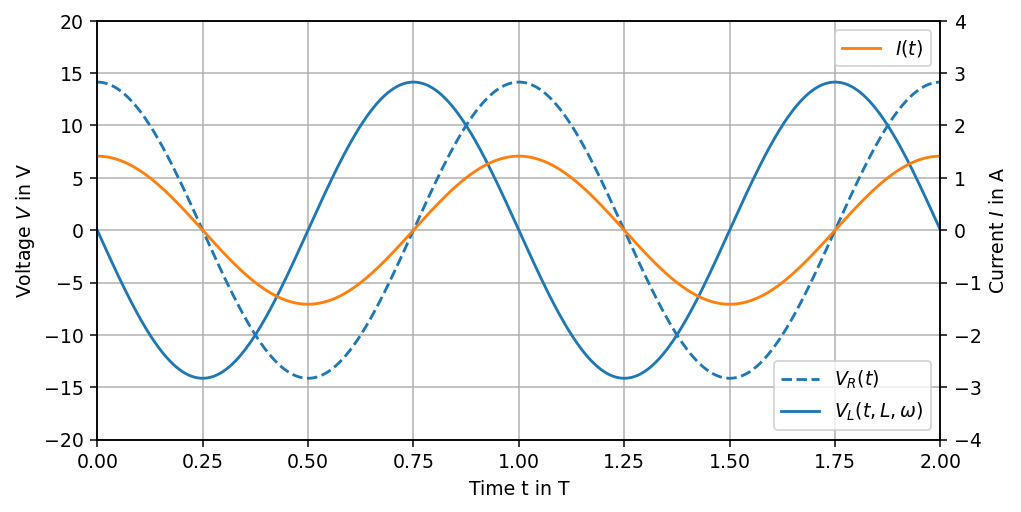

In [203]:
fig, ax = plt.subplots(figsize=(8,4), dpi=136)

ax2=ax.twinx()
ax2.plot(t/T,real(I(t,I0,f)), label=r"$I(t)$", linestyle="-", color="tab:orange")

ax.plot(t/T,real(V_R(I(t,I0,f),R)),  label=r"$V_R(t)$", linestyle="--", color="tab:blue")
ax.plot(t/T,real(V_L(I(t,I0,f),L,omega)), label=r"$V_L(t,L,\omega)$", linestyle="-", color="tab:blue")

ax.set_ylabel("Voltage $V$ in V")
ax2.set_ylabel("Current $I$ in A")
ax.set_xlabel("Time t in T")

ax.set_ylim(-20,20)
ax2.set_ylim(-4,4)

ax.set_xlim(0,2)

ax.grid(True)
ax.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.show()

In [193]:
V = V_R(I(t,I0,f),R) + V_L(I(t,I0,f),L,omega)

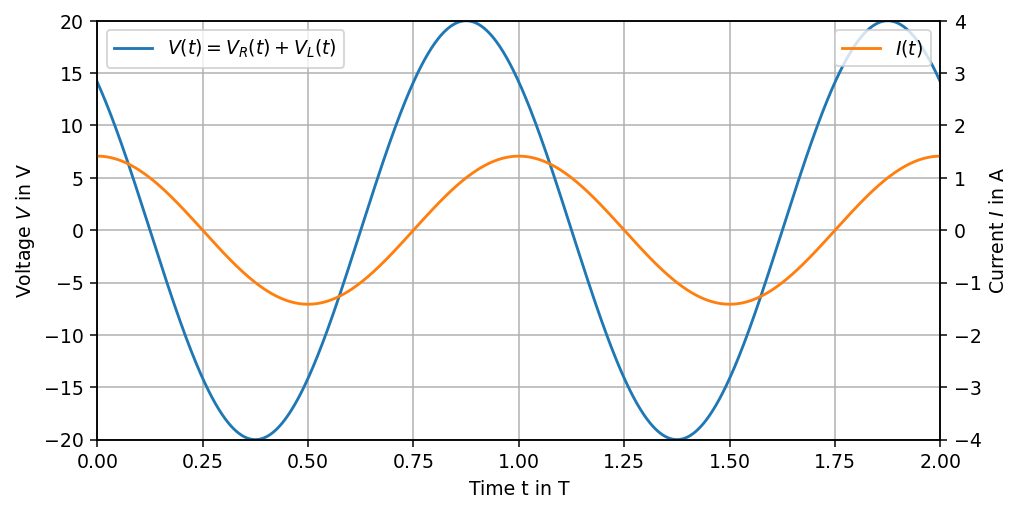

In [205]:
fig, ax = plt.subplots(figsize=(8,4), dpi=136)

ax2=ax.twinx()

ax2.plot(t/T,real(I(t,I0,f)), label=r"$I(t)$", linestyle="-", color="tab:orange")

ax.plot(t/T,V,  label=r"$V(t)= V_R(t)+V_L(t)$", linestyle="-", color="tab:blue")

ax.set_ylabel("Voltage $V$ in V")
ax2.set_ylabel("Current $I$ in A")
ax.set_xlabel("Time t in T")

ax.set_ylim(-20,20)
ax2.set_ylim(-4,4)

ax.set_xlim(0,2)

ax.grid(True)
ax.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.show()

## Power

### Resistor Only

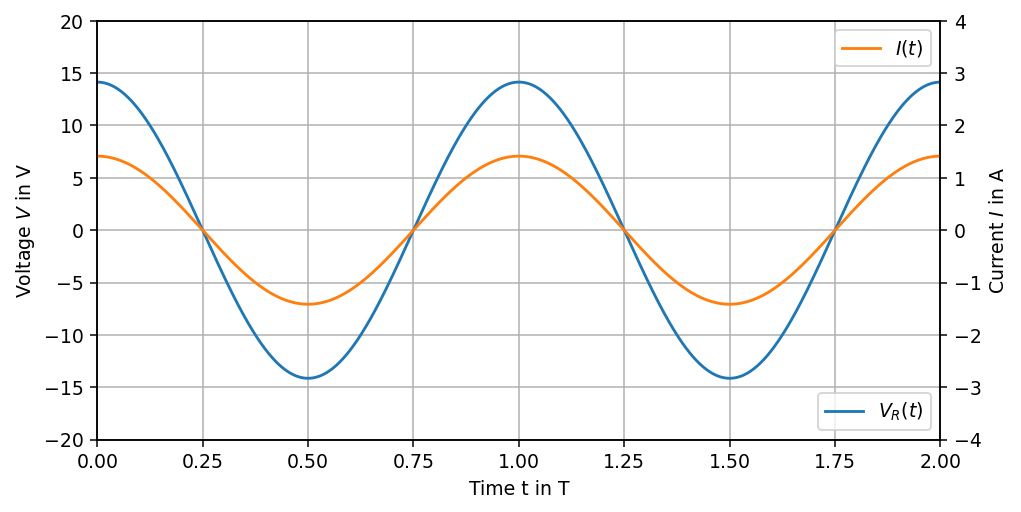

In [225]:
fig, ax = plt.subplots(figsize=(8,4), dpi=136)

ax2=ax.twinx()
ax2.plot(t/T,real(I(t,I0,f)), label=r"$I(t)$", linestyle="-", color="tab:orange")

ax.plot(t/T,real(V_R(I(t,I0,f),R)),  label=r"$V_R(t)$", linestyle="-", color="tab:blue")

ax.set_ylabel("Voltage $V$ in V")
ax2.set_ylabel("Current $I$ in A")
ax.set_xlabel("Time t in T")

ax.set_ylim(-20,20)
ax2.set_ylim(-4,4)

ax.set_xlim(0,2)

ax.grid(True)
ax.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.show()

#### Power

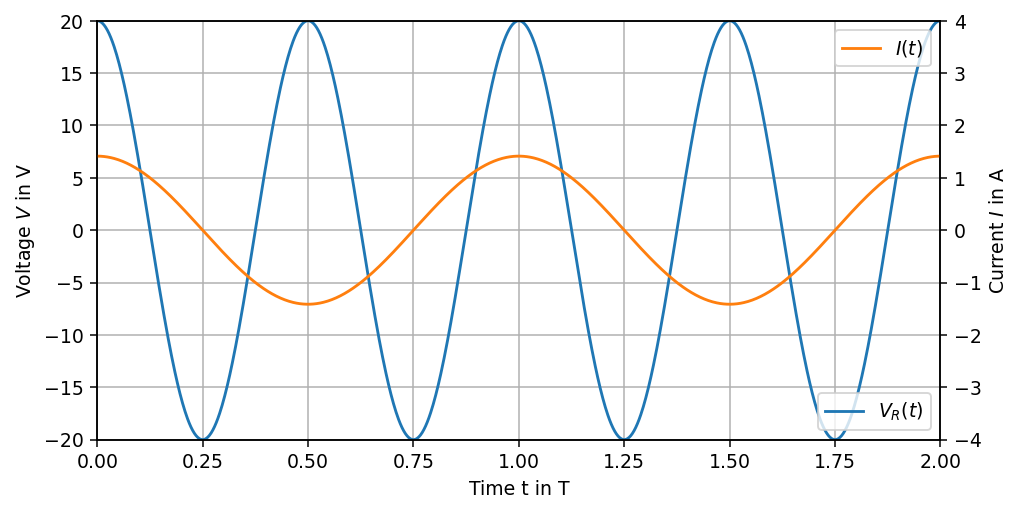

In [226]:
fig, ax = plt.subplots(figsize=(8,4), dpi=136)

ax2=ax.twinx()
ax2.plot(t/T,(I(t,I0,f)), label=r"$I(t)$", linestyle="-", color="tab:orange")

ax.plot(t/T, I(t,I0,f) * V_R(I(t,I0,f),R) , label=r"$V_R(t)$", linestyle="-", color="tab:blue")

ax.set_ylabel("Voltage $V$ in V")
ax2.set_ylabel("Current $I$ in A")

ax.set_xlabel("Time t in T")

ax.set_ylim(-20,20)
ax2.set_ylim(-4,4)

ax.set_xlim(0,2)

ax.grid(True)
ax.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.show()

In [210]:
#S = V*conj(I)

In [214]:
S = V*conj(I(t,I0,f))

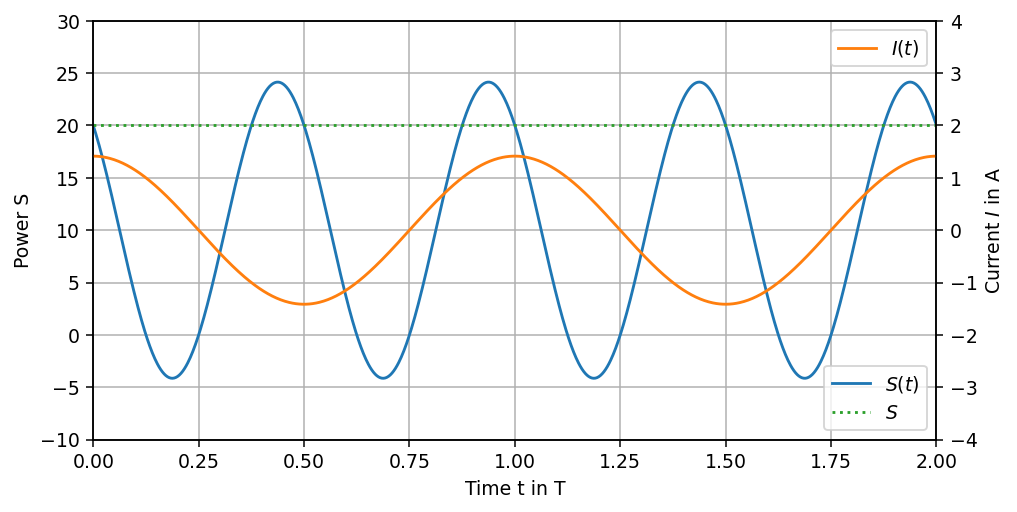

In [221]:
fig, ax = plt.subplots(figsize=(8,4), dpi=136)

ax2=ax.twinx()

ax2.plot(t/T,real(I(t,I0,f)), label=r"$I(t)$", linestyle="-", color="tab:orange")

ax.plot(t/T,real(V)*real(I(t,I0,f)),  label=r"$S(t)$", linestyle="-", color="tab:blue")
ax.plot(t/T,S, label=r"$S$", linestyle=":", color="tab:green")

ax.set_ylabel("Power S")
ax2.set_ylabel("Current $I$ in A")
ax.set_xlabel("Time t in T")

ax.set_ylim(-10,30)
ax2.set_ylim(-4,4)

ax.set_xlim(0,2)

ax.grid(True)
ax.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.show()

In [93]:
a

(1+1j)

In [94]:
conj(a)

(1-1j)